# XGBOOST

1. The main advantages of XGBoost is its lightning speed compared to other algorithms
2. It uses parallel processing to increase the speed.
3. Sequential tree growing
4. However, XGBoost is more difficult to understand, visualize and to tune compared to AdaBoost and random forests.
5. XGBoost also handles missing values in the dataset. So, in data wrangling, you may or may not do a separate treatment for the missing values, because XGBoost is capable of handling missing values internally.
6. XGBoost is very popular because it has been the winning algorithm in a number of Kaggle competitions

### Used Cars Price Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics and models 

from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

#### Read Datasets

In [4]:
df = pd.read_csv('vehicles_data_students.csv')
df.head(5)

,Unnamed: 0,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,55483,7315914053,0,2018.0,ram,promaster 2500,excellent,NaN,gas,44244.0,clean,automatic,NaN,NaN,van,NaN,NaN,ca,32.792800,-116.966500
1,162368,7310885048,13995,2017.0,mazda,cx-3,NaN,4 cylinders,gas,7037.0,rebuilt,automatic,NaN,NaN,SUV,white,NaN,ia,41.207382,-96.023096
2,234393,7308243856,19990,2019.0,mitsubishi,eclipse cross sp,good,NaN,gas,35313.0,clean,other,4wd,NaN,hatchback,white,NaN,nc,35.190000,-80.830000
3,276110,7315817729,0,2019.0,honda,cr-v,NaN,NaN,gas,25626.0,clean,automatic,NaN,NaN,SUV,orange,NaN,ny,40.854573,-74.120219
4,349033,7301620999,42900,2015.0,chevrolet,corvette,excellent,8 cylinders,gas,29000.0,clean,automatic,NaN,NaN,convertible,black,NaN,sc,34.755562,-82.906419


In [6]:
drop_columns = ['Unnamed: 0','id','title_status', 'size', 'lat','long','county']

df = df.drop(columns = drop_columns,axis=1)

In [7]:
df.shape

(64032, 13)

In [8]:
df.isna().sum()

price               0
year              158
manufacturer     2569
model             802
condition       26097
cylinders       26511
fuel              424
odometer          669
transmission      353
drive           19471
type            13785
paint_color     19505
state               0
dtype: int64

In [9]:
df = df.dropna()
df.head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
5,0,2006.0,chrysler,300,like new,8 cylinders,gas,149000.0,automatic,rwd,sedan,white,fl
9,20995,2011.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,92001.0,automatic,4wd,truck,blue,wi
15,50995,2017.0,gmc,yukon denali,like new,8 cylinders,gas,70227.0,automatic,4wd,SUV,grey,ak
22,13500,2014.0,chevrolet,tahoe,good,8 cylinders,gas,96007.0,automatic,rwd,SUV,white,fl
29,34990,2016.0,gmc,canyon crew cab sle pickup,good,6 cylinders,gas,34425.0,other,4wd,pickup,red,ma


In [10]:
df.shape

(17491, 13)

In [11]:
df.describe()

,price,year,odometer
count,1.749100e+04,17491.000000,1.749100e+04
mean,1.632545e+04,2009.535247,1.122616e+05
std,1.294429e+05,9.596493,2.155149e+05
min,0.000000e+00,1918.000000,0.000000e+00
25%,5.600000e+03,2006.000000,5.578700e+04
50%,1.095000e+04,2012.000000,1.025670e+05
75%,2.250000e+04,2015.000000,1.480000e+05
max,1.700000e+07,2022.000000,1.000000e+07


**Check if there are any duplicates. Remove if there any duplicates**

In [12]:
df.drop_duplicates(inplace=True)

df.shape

(16399, 13)

###### Filter Categorical Features

In [13]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

categorical_columns = []

features = df.columns.values.tolist()

for col in features:
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)

In [14]:
categorical_columns

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state']

## Encoding categorical columns using get_dummies.

In [15]:
df_dummies = pd.get_dummies(df[categorical_columns],drop_first=True)

In [16]:
df_dummies.head()

,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_dummies.shape

(16399, 4317)

In [18]:
df = df.join(df_dummies)

In [19]:
df.shape

(16399, 4330)

In [20]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,2006.0,chrysler,300,like new,8 cylinders,gas,149000.0,automatic,rwd,...,0,0,0,0,0,0,0,0,0,0
9,20995,2011.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,92001.0,automatic,4wd,...,0,0,0,0,0,0,0,1,0,0
15,50995,2017.0,gmc,yukon denali,like new,8 cylinders,gas,70227.0,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0
22,13500,2014.0,chevrolet,tahoe,good,8 cylinders,gas,96007.0,automatic,rwd,...,0,0,0,0,0,0,0,0,0,0
29,34990,2016.0,gmc,canyon crew cab sle pickup,good,6 cylinders,gas,34425.0,other,4wd,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.drop(columns=categorical_columns,axis=1,inplace=True)

In [22]:
df.head(2)

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,2006.0,149000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,20995,2011.0,92001.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


##### Selecting realistic data. Here Domain Knowledge will help a lot to decide what could be the higher and lower price

Let's consider below prices in this example

In [23]:
df = df[df['price']> 1000]
df = df[df['price']< 40000]

In [24]:
df.shape

(14742, 4320)

### Devide dataset into features and label

In [25]:
y = df['price']
x = df.drop(['price'], axis=1)

In [26]:
# Data split into train test
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25, random_state=10)

# XGB

In [27]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [28]:
y_pred = xgb.predict(test_x)

In [29]:
r2_score(test_y,y_pred)

0.8494808147571992

**84%**

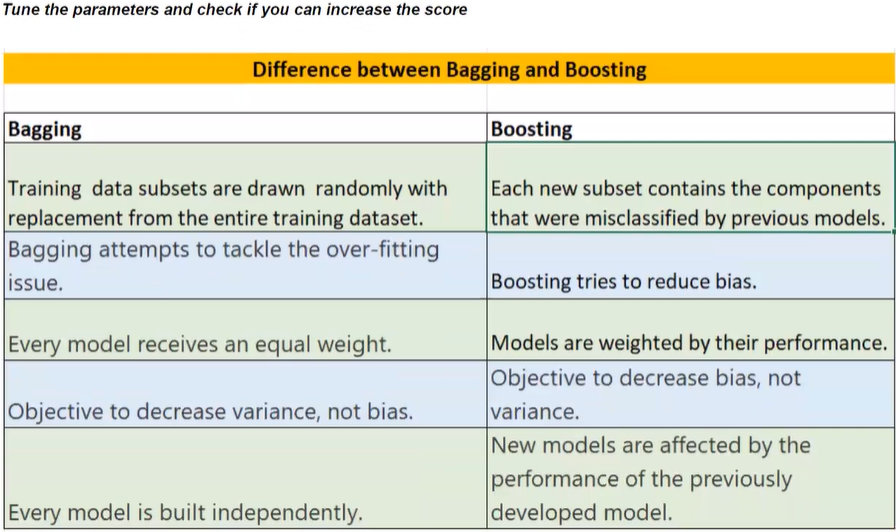